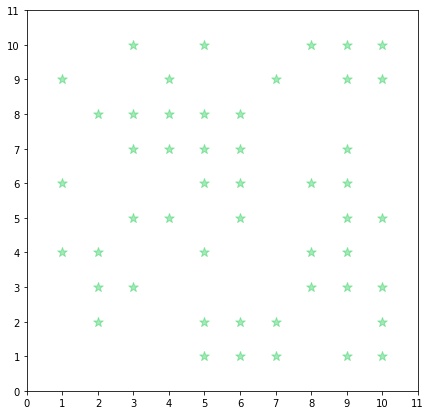

In [8]:
#https://blog.csdn.net/huwp001/article/details/114627398

import numpy as np
import matplotlib.pyplot as plt

# 构造房间，放置垃圾易拉罐
def room():
    xxs = list()
    
    for i in range(10):
        xx = np.linspace(1, 1, 5)
        d = np.pad(xx, (0, 5), 'constant', constant_values = (0, 0))
        np.random.shuffle(d)
        xxs.append(d)
        
    k = 0
    xxs = np.array(xxs)
    
    gbpoints = list()
    for x in np.nditer(xxs):
        if x == 1:
            a = int(k / xxs.shape[1])
            b = k % xxs.shape[1]
            gbpoints.append([b, a])
        k += 1
    # 垃圾的坐标从 1 开始
    pts = np.array(gbpoints) + [1, 1]
    return pts

# 打印房间以及易拉罐
gbpoints = room()
gbpoints2 = np.array(gbpoints).T

fig1 = plt.figure(num = 'robin的房间', figsize = (7, 7), facecolor = '#FFFFFF', edgecolor='#0000FF')
plt.xlim([0, 11])
plt.ylim([0, 11])
# 设置x轴刻度
plt.xticks(np.linspace(0, 11, 12, endpoint = True))
# 设置y轴刻度
plt.yticks(np.linspace(0, 11, 12, endpoint = True))
plt.scatter(gbpoints2[0], gbpoints2[1], color = (0.1, 0.8, 0.3, 0.4), s = 100, marker = '*')


In [ ]:
peoples = list()
for i in range(2):
    peoples.append(np.random.randint(0, 7, 243))

np.savetxt('pts.txt', gbpoints, fmt='%d')
np.savetxt('peoples.txt', np.array(peoples), fmt='%d')


拾取易拉罐9次，撞墙11次， 拾取失败18次 , 得分17 


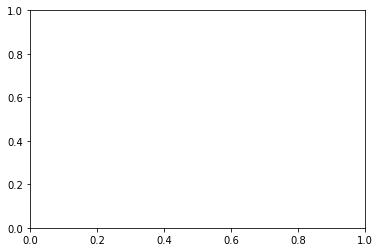

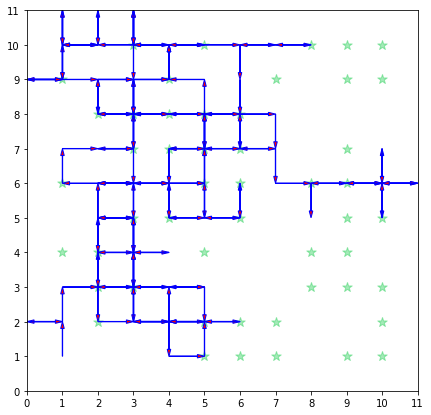

In [10]:
people = list()
for i in range(2):
    people.append(np.random.randint(0, 7, 243))

pts = gbpoints
    
def people_work(people, pts):
    haspts = np.array([[999, 999], [888, 888]])
    p = np.array([1, 1])
    lines = list()
    lines.append(p)
    
    score = 0
    sidect = 0
    failcolct = 0
    
    for step in people:
        if step == 6:
            step = np.random.randint(4, size = 1)[0]
        p2 = p
        if step == 0:
            p2 = p + [0, 1]
        if step == 1:
            p2 = p + [0, -1]
        if step == 2:
            p2 = p + [1, 0]
        if step == 3:
            p2 = p + [-1, 0]
        
        if p2.__contains__(0) or p2.__contains__(11):
            score = score - 5
            lines.append(p2)
            lines.append(p)
            sidect = sidect + 1
        else:
            p = p2
            lines.append(p)
        
        if step == 4:
            p2 = p
        if step == 5:
            if (pts == p2).all(1).any() and (haspts == p2).all(1).any() == False:
                score = score + 10
                haspts = np.row_stack((haspts, p2))
            else:
                score = score - 1
                failcolct = failcolct + 1
        
    print('拾取易拉罐%d次，撞墙%d次， 拾取失败%d次 , 得分%d ' % (len(haspts)-2, sidect, failcolct, score))
    return lines, score

lines, score = people_work(people[0], pts)

lines = np.array(lines)
#np.savetxt('lines.txt', lines, fmt='%d')

plt.cla()
fig1 = plt.figure(num = 'robin的房间', figsize = (7, 7), facecolor = '#FFFFFF', edgecolor = '#0000FF')
plt.xlim([0,11])
plt.ylim([0,11])
plt.xticks(np.linspace(0,11,12,endpoint=True))  # 设置x轴刻度
plt.yticks(np.linspace(0,11,12,endpoint=True))  # 设置y轴刻度

pts2 = np.array(pts).T
plt.scatter(pts2[0], pts2[1], color = (0.1, 0.8, 0.3, 0.4), s = 100, marker = '*')

for i in range(len(lines) - 1):
    A = lines[i]
    B = lines[i + 1]
    
    plt.arrow(A[0], A[1], B[0] - A[0], B[1] - A[1], 
              width = 0.01,
              length_includes_head = True,
              head_width = 0.1,
              head_length = 0.2,
              fc = 'r',
              ec = 'b')

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# 执行策略
#  罗比有7种可能选择：北移、南移、东移、西移、随机移动、不动、收集罐子
#   0=向北移动，1=向南移动，2=向东移动，3=向西移动，4=不动，5=捡拾罐子，6=随机移动
#  每个动作都会受到奖赏或惩罚。如果罗比所在的格子中有罐子并且收集起来了，就会得到10分的奖赏。
#  如果进行收集罐子的动作而格子中又没有罐子，就会被罚1分。如果撞到了墙，会被罚5分，并弹回原来的格子。

def people_work(people, pts):
    haspts = np.array([[999, 999], [888, 888]])
    # 初始坐标点
    p = np.array([1, 1])
    # 行走路径
    lines = list()
    lines.append(p)
    
    # 得分
    score = 0
    # 撞墙次数
    sidect = 0
    # 拾取失败的次数
    failcolct = 0
    
    for step in people:
        if step == 6:
            step = np.random.randint(4, size = 1)[0]
        p2 = p
        if step == 0:
            p2 = p + [0, 1]
        if step == 1:
            p2 = p + [0, -1]
        if step == 2:
            p2 = p + [1, 0]
        if step == 3:
            p2 = p + [-1, 0]
        # 检测p2 是否撞墙
        if p2.__contains__(0) or p2.__contains__(11):
            score = score - 5
            lines.append(p2)
            lines.append(p)
            sidect = sidect + 1
        else:
            p = p2
            lines.append(p)
        
        if step == 4:
            p2 = p
        if step == 5:
            if (pts == p2).all(1).any() and (haspts == p2).all(1).any() == False:
                # 有物体
                score = score + 10
                haspts = np.row_stack((haspts, p2))
            else:
                score = score - 1
                failcolct = failcolct + 1
        
    #print('拾取易拉罐%d次，撞墙%d次， 拾取失败%d次 , 得分%d ' % (len(haspts)-2, sidect, failcolct, score))
    return lines, score

#基因突变
def mutation(gene):
    #基因链上随机取3个值
    for i in range(3):
        ixs = np.random.randint(len(gene), size = 1)[0]
        gene[ixs] = np.random.randint(7, size = 1)[0]
    return gene

#交叉操作
def crossover(p1, p2):
    # 基因重组, 随机得到一个拆分点，重新组合
    s1 = np.random.randint(len(p1), size = 1)[0]
    c1 = mutation(np.append(p1[:s1], p2[s1:]))
    c2 = mutation(np.append(p2[:s1], p1[s1:]))
    return c1, c2

# 构造房间，放置垃圾易拉罐，注意放置了50%的易拉罐
def room():
    xxs = list()
    
    #10*10的房间
    for i in range(10):
        xx = np.linspace(1, 1, 5)
        #在第0行后补5个0
        d = np.pad(xx, (0, 5), 'constant', constant_values = (0, 0))
        #随机打乱
        np.random.shuffle(d)
        xxs.append(d)
        
    k = 0
    xxs = np.array(xxs)
    
    #垃圾点坐标
    gbpoints = list()
    #迭代输出，[[0 1 2]，[3 4 5]] 输出 0, 1, 2, 3, 4, 5
    for x in np.nditer(xxs):
        if x == 1:
            a = int(k / xxs.shape[1])
            b = k % xxs.shape[1]
            gbpoints.append([b, a])
        k += 1
    # 垃圾的坐标从 1 开始
    pts = np.array(gbpoints) + [1, 1]
    return pts

#淘汰函数，适应度函数
def life(people):
    scores = list()
    for i in range(len(people)):
        # 每10个人输出一个 '.'
        if i % 10 == 0:
            print('.', end=(''))
        a = list()
        # 每个人要工作100次，取平均值
        for k in range(100):
            lines, score = people_work(people[i], room())
            a.append(score)
        score = np.average(a)
        scores.append(score)
    scores = np.array(scores)
    print()
    print('这一代人的平均工作能力 %.3f' % np.average(scores))
    #返回index
    args = np.argsort(scores)
    
    # 随机寻找优秀的人去交叉组合
    p = [0.1, 0.2, 0.3, 0.4]
    children = list()
    #人群拆分为4部分
    argss = np.split(args, 4)
    for i in range(100):
        k = int(np.random.choice([0, 1, 2, 3], 1, replace= True, p = p))
        spouse = np.random.choice(args[k], 2, replace = True)
        man = people[spouse[0]]
        woman = people[spouse[1]]
        c1, c2 = crossover(man, woman)
        children.append(c1)
        children.append(c2)
    return children

# Main function
GENE_LEN = 243

#  初始化，人数200个，基因随机
people = list()
for i in range(200):
    people.append(np.random.randint(0, 7, GENE_LEN))

# 暂定繁衍1000代
for epoch_num in range(1000):
    print('开始繁衍第%d代' % epoch_num)
    np.savetxt('people%d.txt' % epoch_num, np.array(people), fmt = '%d')
    people = life(people)
    epoch_num += 1

开始繁衍第0代
....................
这一代人的平均工作能力 -16.690
开始繁衍第1代
....................
这一代人的平均工作能力 -18.531
开始繁衍第2代
....................
这一代人的平均工作能力 -12.938
开始繁衍第3代
....................
这一代人的平均工作能力 -9.667
开始繁衍第4代
...

KeyboardInterrupt: 